*import libraries*

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

*Data Collection and pre- processing*

In [73]:
car_data= pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [74]:
car_data.shape

(4340, 8)

In [75]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [76]:
#Checking the number of missing values
car_data.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [77]:
#Checking the number of missing values
car_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [78]:
#checking the distribution of categorical data
print(car_data.fuel.value_counts())   #This will give the value counts of Petrol, Diesel, etc
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())
print(car_data.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


*encoding the categorical data*

In [79]:
# ecoding "fuel" column
car_data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace =True)

# ecoding "seller_type" column
car_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace =True)

# ecoding "transmission" column
car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace =True)

# ecoding "owner" column
car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace =True)

<ipython-input-79-de9f8ade2c02>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace =True)
<ipython-input-79-de9f8ade2c02>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace =True)
<ipython-input-79-de9f8ade2c02>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

In [80]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


*Splitting the data into training data and testing data*

In [81]:
x= car_data.drop((['name','selling_price']),axis=1)
y= car_data['selling_price']

In [82]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [83]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


*Splitting training and test data*

In [84]:
# Train-Test Split between Training + Development vs Test
x_temp,x_test,y_temp,y_test= train_test_split(x,y,test_size=0.1,random_state=42)

#Now we have to split between Training vs Development
x_train,x_dev,y_train,y_dev= train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)
print('Training set size: ',x_train.shape)
print('Development set size: ',x_dev.shape)
print('Test set size: ',x_test.shape)

Training set size:  (2929, 6)
Development set size:  (977, 6)
Test set size:  (434, 6)


*Model Training*

In [85]:
#Loading linear regression model
lin_reg= LinearRegression()

In [86]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [87]:
#prediction on development data
y_dev_pred=lin_reg.predict(x_dev)

In [88]:
#R squared error
error_score= metrics.r2_score(y_dev,y_dev_pred)
print('R squared error: ',error_score)

R squared error:  0.48892848658634347


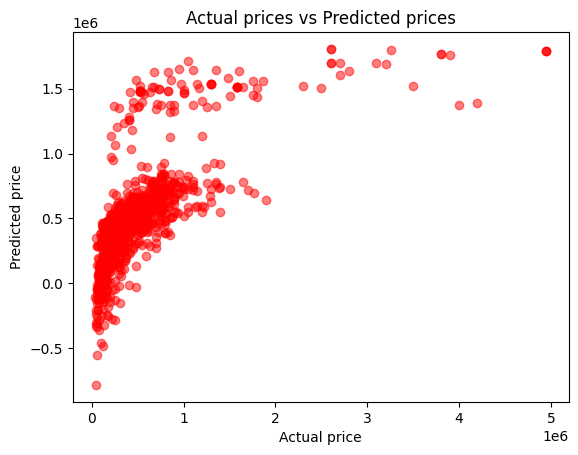

In [89]:
plt.scatter(y_dev, y_dev_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual price')    #x : y_dev
plt.ylabel('Predicted price')  #y : y_dev_pred
plt.title('Actual prices vs Predicted prices')
plt.show()

In [90]:
#Predict and evaluate the Test data
y_test_pred=lin_reg.predict(x_test)

In [91]:
#R squared error
error_score= metrics.r2_score(y_test,y_test_pred)
print('R squared error: ',error_score)

R squared error:  0.4043985093090704


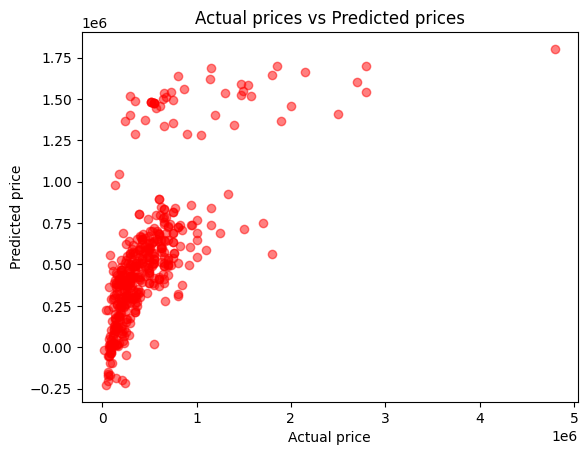

In [92]:
plt.scatter(y_test, y_test_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual price')    #x : y_test
plt.ylabel('Predicted price')  #y : y_test_pred
plt.title('Actual prices vs Predicted prices')
plt.show()

*Lasso*

In [93]:
#Loading Lasso
lasso_reg= Lasso()

In [94]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [95]:
#prediction on development data
y_dev_pred=lasso_reg.predict(x_dev)

In [96]:
#R squared error
error_score= metrics.r2_score(y_dev,y_dev_pred)
print('R squared error: ',error_score)

R squared error:  0.4889291689210602


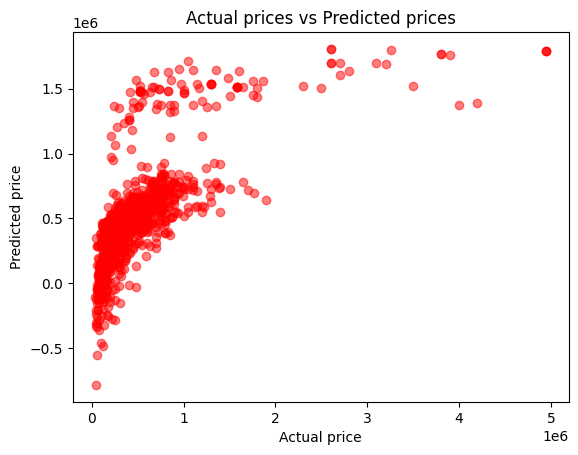

In [97]:
plt.scatter(y_dev, y_dev_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual price')    #x : y_dev
plt.ylabel('Predicted price')  #y : y_dev_pred
plt.title('Actual prices vs Predicted prices')
plt.show()

In [98]:
#Predict and evaluate the Test data
y_test_pred=lasso_reg.predict(x_test)

In [99]:
#R squared error
error_score= metrics.r2_score(y_test,y_test_pred)
print('R squared error: ',error_score)

R squared error:  0.4044023952052448


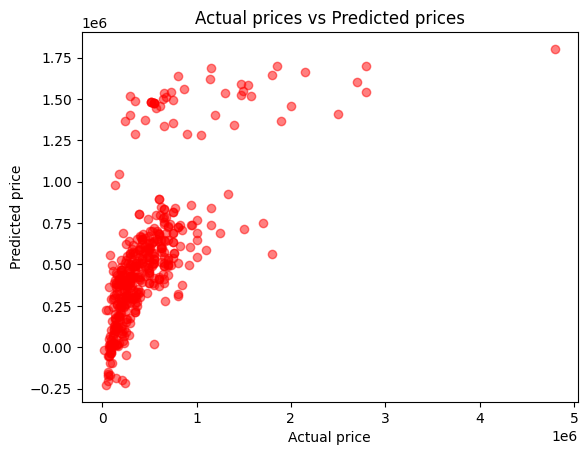

In [100]:
plt.scatter(y_test, y_test_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.xlabel('Actual price')    #x : y_test
plt.ylabel('Predicted price')  #y : y_test_pred
plt.title('Actual prices vs Predicted prices')
plt.show()